## Observations and Insights 

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# test

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#check for repeating values in Mouse ID
len(mouse_metadata["Mouse ID"].unique())

#study_results
#mouse_metadata
#study_results

# Combine the data into a single dataset

combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID', )

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice.
combined_data_df["Mouse ID"].count()

1893

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# concatenate Mouse Id and Timepoint to find duplicates
combined_data_df["MouseID_Timepoint"] = combined_data_df["Mouse ID"].map(str) + combined_data_df["Timepoint"].map(str)

#find the number of duplicated MouseID and Timepoint
combined_data_df["MouseID_Timepoint"].duplicated().sum()


#show these duplicted values.......There are five rows that have the same mouse ID and timepoint
combined_data_df["MouseID_Timepoint"].loc[combined_data_df["MouseID_Timepoint"].duplicated()]

# another way to check without adding a new column.  didn;t know you could do this, Or I would not ahve added new column
#combined_data_df.duplicated(subset = ["MouseID_Timepoint"]).sum()

909     g9890
911     g9895
913    g98910
915    g98915
917    g98920
Name: MouseID_Timepoint, dtype: object

In [16]:
#Remove duplicates, and store in new DF

# Optional: Get all the data for the duplicate mouse ID.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.drop_duplicates(subset=["MouseID_Timepoint"])

#change index value 
clean_df = clean_df.set_index("MouseID_Timepoint")
clean_df

#car_data = car_data.set_index('car name')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
MouseID_Timepoint,,,,,,,,
k4030,k403,Ramicane,Male,21,16,0,45.000000,0
k4035,k403,Ramicane,Male,21,16,5,38.825898,0
k40310,k403,Ramicane,Male,21,16,10,35.014271,1
k40315,k403,Ramicane,Male,21,16,15,34.223992,1
k40320,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
z96925,z969,Naftisol,Male,9,30,25,63.145652,2
z96930,z969,Naftisol,Male,9,30,30,65.841013,3
z96935,z969,Naftisol,Male,9,30,35,69.176246,4


In [17]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stnd_dv = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"MEAN": mean, "MEDIAN": median, "VARIANCE": variance, "STND_DEV": stnd_dv, "SEM": sem})
summary_df


,MEAN,MEDIAN,VARIANCE,STND_DEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Treatment Regimen')

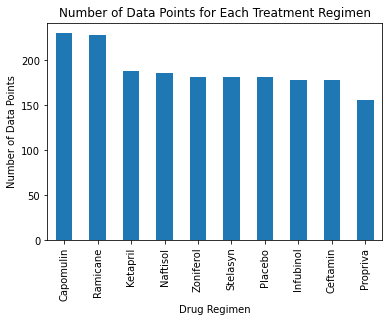

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_bar = clean_df["Drug Regimen"].value_counts().plot.bar(width =0.5)

# Set labels 
drug_bar.set_xlabel("Drug Regimen")
drug_bar.set_ylabel("Number of Data Points")
drug_bar.set_title("Number of Data Points for Each Treatment Regimen")

#drug_bar.count().head(10)

([<matplotlib.axis.XTick at 0x228ee3a66a0>,
 [Text(0, 0, '230'),
  Text(1, 0, '178'),
  Text(2, 0, '178'),
  Text(3, 0, '188'),
  Text(4, 0, '186'),
  Text(5, 0, '181'),
  Text(6, 0, '156'),
  Text(7, 0, '228'),
  Text(8, 0, '181'),
  Text(9, 0, '182')])

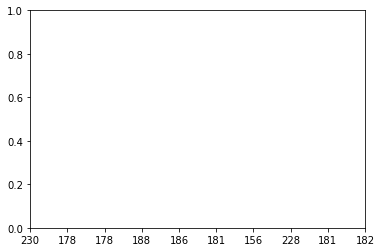

In [66]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count_mice_treat = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
#count_mice

drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

x_axis = np.arange(len(count_mice_treat))
Y_Axis_value = [value for value in count_mice_treat]



tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Y_Axis_value)

#plt.title("Number of Mice per Treatment",fontsize = 20)
#plt.xlabel("Drug Regimen",fontsize = 14)
#plt.ylabel("Number of Mice",fontsize = 14)



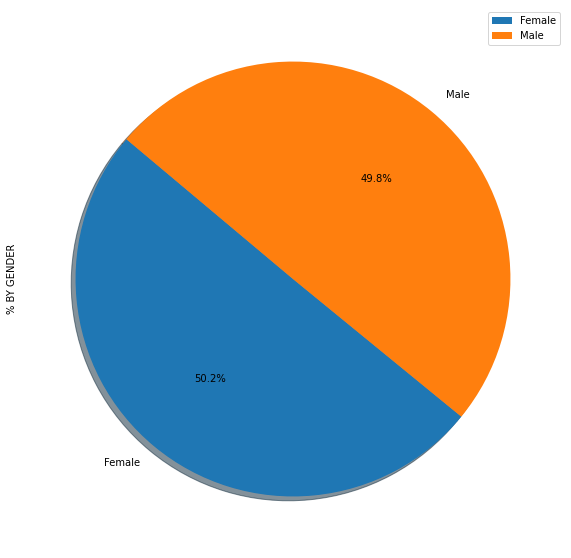

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_mice = clean_df["Mouse ID"].nunique()
gender_group = clean_df.groupby(["Sex"])
#gender_group.count().head(20)
gender_count = gender_group["Mouse ID"].nunique()
#gender_count

percent_by_gender = total_mice/ gender_count *100

gender_bar_df = pd.DataFrame({"% BY GENDER":percent_by_gender,"TOTAL":gender_count})

gender_pie_chart = gender_bar_df.plot.pie(y="% BY GENDER", figsize=(15,10), startangle=140, shadow = True, autopct="%1.1f%%")




([<matplotlib.patches.Wedge at 0x228ee227340>,
 [Text(-0.7017365844029831, -0.8470925369228767, ''),
  Text(0.7017366637135073, 0.8470924712215522, '')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.3827654529346403, 0.4620504388481193, '49.8%')])

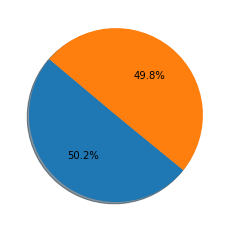

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(percent_by_gender, startangle=140, shadow = True, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
